# Accuracy Comparison of Machine Learning Algorithms on World Happiness Index Data


# Abstract: 
This study aims to compare the accuracy performances of different machine learning algorithms (Logistic Regression, Decision Tree, Support Vector Machines (SVMs), Random Forest, Artificial Neural Network, and XGBoost) using World Happiness Index data. The study is based on the 2024 World Happiness Report data and employs indicators such as Ladder Score, GDP Per Capita, Social Support, Healthy Life Expectancy, Freedom to Determine Life Choices, Generosity, and Perception of Corruption. Initially, the K-Means clustering algorithm is applied to group countries into four main clusters representing distinct happiness levels based on their socioeconomic profiles. Subsequently, classification algorithms are used to predict the cluster membership and the accuracy scores obtained serve as an indirect measure of the clustering quality. As a result of the analysis, Logistic Regression, Decision Tree, SVM, and Neural Network achieve high accuracy rates of 86.2%, whereas XGBoost exhibits the lowest performance at 79.3%. Furthermore, the practical implications of these findings are significant, as they provide policymakers with actionable insights to develop targeted strategies for enhancing national happiness and improving socioeconomic well-being. In conclusion, this study offers valuable information for more effective classification and analysis of World Happiness Index data by comparing the performance of various machine learning algorithms.

# Introduction Data Mining

This course provides a practical introduction to data mining using Python, focusing on real-world application with the World Happiness Report dataset. By the end of the course, students will gain hands-on experience in data preprocessing, analysis, modeling, and interpretation of results using various machine learning techniques.


#  Loading the Dataset

In [29]:
import pandas as pd      # Data manipulation and analysis
import numpy as np       # Numerical operations
import matplotlib.pyplot as plt  # Plotting graphs
import seaborn as sns    # Advanced visualization

# Load the dataset from the specified path
data = pd.read_csv("2024.csv")


In [30]:
data

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102
139,Sierra Leone,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068
140,Lesotho,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875
141,Lebanon,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


# Examining the Dataset

In [31]:
# Display the first 5 rows to get an initial look at the data
print(data.head())


  Country name  Ladder score  upperwhisker  lowerwhisker  \
0      Finland         7.741         7.815         7.667   
1      Denmark         7.583         7.665         7.500   
2      Iceland         7.525         7.618         7.433   
3       Sweden         7.344         7.422         7.267   
4       Israel         7.341         7.405         7.277   

   Explained by: Log GDP per capita  Explained by: Social support  \
0                             1.844                         1.572   
1                             1.908                         1.520   
2                             1.881                         1.617   
3                             1.878                         1.501   
4                             1.803                         1.513   

   Explained by: Healthy life expectancy  \
0                                  0.695   
1                                  0.699   
2                                  0.718   
3                                  0.724   
4   

In [32]:
# Shows the first 10 lines
data.head(10) 


,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,7.383,7.256,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,7.389,7.215,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,7.213,7.031,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,7.147,6.973,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,7.141,6.973,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [33]:
# Get information on data types and missing values
print(data.info()) #data.info() is useful to detect missing values and check data types.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                143 non-null    object 
 1   Ladder score                                143 non-null    float64
 2   upperwhisker                                143 non-null    float64
 3   lowerwhisker                                143 non-null    float64
 4   Explained by: Log GDP per capita            140 non-null    float64
 5   Explained by: Social support                140 non-null    float64
 6   Explained by: Healthy life expectancy       140 non-null    float64
 7   Explained by: Freedom to make life choices  140 non-null    float64
 8   Explained by: Generosity                    140 non-null    float64
 9   Explained by: Perceptions of corruption     140 non-null    float64
 10  Dystopia + res

# Analysis and Filling of Missing Data

In [34]:
data.isnull().sum()

Country name                                  0
Ladder score                                  0
upperwhisker                                  0
lowerwhisker                                  0
Explained by: Log GDP per capita              3
Explained by: Social support                  3
Explained by: Healthy life expectancy         3
Explained by: Freedom to make life choices    3
Explained by: Generosity                      3
Explained by: Perceptions of corruption       3
Dystopia + residual                           3
dtype: int64

# Methods for Filling in Missing Data

In [35]:
# For numerical columns, fill missing values with the column mean
numeric_columns = data.select_dtypes(include=[np.number]).columns  # automatically select numeric columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean()) #Calculates the mean value of each numeric column. Fills empty (NaN) cells with mean value. 
print(data.isnull().sum())  # Check for missing values in the dataset

Country name                                  0
Ladder score                                  0
upperwhisker                                  0
lowerwhisker                                  0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64


# Data Cleaning 

Purpose: Prepare a suitable data set for the model.

Removing unnecessary columns: E.g. "upperwhisker", "lowerwhisker" can be removed if it is not a target for analysis.

In [36]:
df = data.drop(columns=["upperwhisker", "lowerwhisker" ])


In [37]:
df

,Country name,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),3.295,0.534,0.665,0.262,0.473,0.189,0.072,1.102
139,Sierra Leone,3.245,0.654,0.566,0.253,0.469,0.181,0.053,1.068
140,Lesotho,3.186,0.771,0.851,0.000,0.523,0.082,0.085,0.875
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


In [38]:
#Let's remove 'Explained by:' from variable names.
df.columns = df.columns.str.replace('Explained by: ', '').str.strip()


In [39]:
df.columns

Index(['Country name', 'Ladder score', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

# Data Transformation


Although some variables in the dataset already have a certain scale (e.g., “Ladder Score” on a logarithmic scale from 0 to 10, “Log GDP per Capita”), the normalization step is important to improve the performance of machine learning algorithms and make more consistent comparisons across all variables. Therefore, by including the normalization step in the analysis process, we can eliminate the differences in scale between variables and make the algorithms work more efficiently. Below is a code example that shows how to perform the normalization step on the dataset:

In [40]:
from sklearn.preprocessing import StandardScaler

# Let's define the numeric columns (except Country name)
numeric_columns = ['Ladder score', 
                   'Log GDP per capita', 'Social support', 
                   'Healthy life expectancy', 'Freedom to make life choices', 
                   'Generosity', 'Perceptions of corruption', 'Dystopia + residual']

# Let's apply normalization using StandardScaler
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [41]:
data[numeric_columns]

,Ladder score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,1.897299,1.109952,1.331837,1.070816,1.487977,-0.058992,3.148628,0.955080
1,1.761865,1.262656,1.173601,1.095417,1.263263,0.797280,3.164698,0.575755
2,1.712148,1.198234,1.468773,1.212268,1.238294,1.543066,0.223996,0.894690
3,1.556999,1.191076,1.115784,1.249169,1.356894,1.032065,2.971865,0.154911
4,1.554427,1.012126,1.152300,1.347570,0.127205,0.092927,0.312378,1.362713
...,...,...,...,...,...,...,...,...
138,-1.913724,-2.015713,-1.428170,-1.592167,-0.921464,0.590118,-0.659821,-0.894366
139,-1.956583,-1.729393,-1.729428,-1.647518,-0.946433,0.479631,-0.812481,-0.958531
140,-2.007156,-1.450230,-0.862171,-3.203488,-0.609360,-0.887643,-0.555370,-1.322759
141,-2.417746,-0.004312,-1.695955,0.215956,-2.794087,-1.080995,-1.005314,-3.111815


# Feature Engineering
For example, the change between the "upperwhisker" and "lowerwhisker" variables in the Happiness data set can be calculated as follows.

In [42]:
data['whisker_change'] = data['upperwhisker'] - data['lowerwhisker']


In [44]:
data

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,whisker_change
0,Finland,1.897299,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,0.955080,1.109952,1.331837,1.070816,1.487977,-0.058992,3.148628,0.148
1,Denmark,1.761865,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,0.575755,1.262656,1.173601,1.095417,1.263263,0.797280,3.164698,0.165
2,Iceland,1.712148,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,0.894690,1.198234,1.468773,1.212268,1.238294,1.543066,0.223996,0.185
3,Sweden,1.556999,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,0.154911,1.191076,1.115784,1.249169,1.356894,1.032065,2.971865,0.155
4,Israel,1.554427,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,1.362713,1.012126,1.152300,1.347570,0.127205,0.092927,0.312378,0.128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),-1.913724,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,-0.894366,-2.015713,-1.428170,-1.592167,-0.921464,0.590118,-0.659821,0.334
139,Sierra Leone,-1.956583,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,-0.958531,-1.729393,-1.729428,-1.647518,-0.946433,0.479631,-0.812481,0.242
140,Lesotho,-2.007156,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,-1.322759,-1.450230,-0.862171,-3.203488,-0.609360,-0.887643,-0.555370,0.565
141,Lebanon,-2.417746,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-3.111815,-0.004312,-1.695955,0.215956,-2.794087,-1.080995,-1.005314,0.181


In [46]:
#The total social factor score can be calculated as follows:
df['Social_Composite'] = df[['Social support', 'Freedom to make life choices', 'Generosity']].sum(axis=1)


In [47]:
df['Social_Composite'] 

0      2.573
1      2.547
2      2.694
3      2.560
4      2.307
       ...  
138    1.327
139    1.216
140    1.456
141    0.818
142    0.091
Name: Social_Composite, Length: 143, dtype: float64

In [50]:
#New labels: The following code can be used to give a “Cluster” label to each country as a result of K-means clustering.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
df['Cluster'] = kmeans.fit_predict(data[numeric_columns])


In [51]:
df['Cluster']

0      2
1      2
2      2
3      2
4      1
      ..
138    0
139    0
140    0
141    3
142    0
Name: Cluster, Length: 143, dtype: int32

# 4. Exploratory Data Analysis (EDA)

Basic Statistical Analysis

🎯 Purpose: To see the general trends of the variables in the data set (mean, min, max, standard deviation, etc.).
Mean → Average

Std → Standard deviation (spread of distribution)

Min/Max → Lowest/highest values

25%, 50%, 75% → Quartiles, median etc.

In [52]:
import pandas as pd
# Basic statistical information
print(data.describe())


       Ladder score  upperwhisker  lowerwhisker  \
count  1.430000e+02    143.000000    143.000000   
mean  -9.937661e-17      5.641175      5.413972   
std    1.003515e+00      1.155008      1.187133   
min   -3.262925e+00      1.775000      1.667000   
25%   -6.870988e-01      4.845500      4.606000   
50%    2.206550e-01      5.895000      5.674000   
75%    7.615356e-01      6.507500      6.319000   
max    1.897299e+00      7.815000      7.667000   

       Explained by: Log GDP per capita  Explained by: Social support  \
count                        143.000000                    143.000000   
mean                           1.378807                      1.134329   
std                            0.420584                      0.329777   
min                            0.000000                      0.000000   
25%                            1.079000                      0.924500   
50%                            1.403000                      1.217000   
75%                          

# Correlation Analysis
🎯 Purpose: To determine which variables have a strong relationship with happiness (Ladder Score).
Correlation data shows which features are more influential and helps in selecting variables for modeling.

The correlation coefficient (r) varies between -1 and 1.
r > 0.7 → Strong positive relationship
r < -0.7 → Strong negative relationship


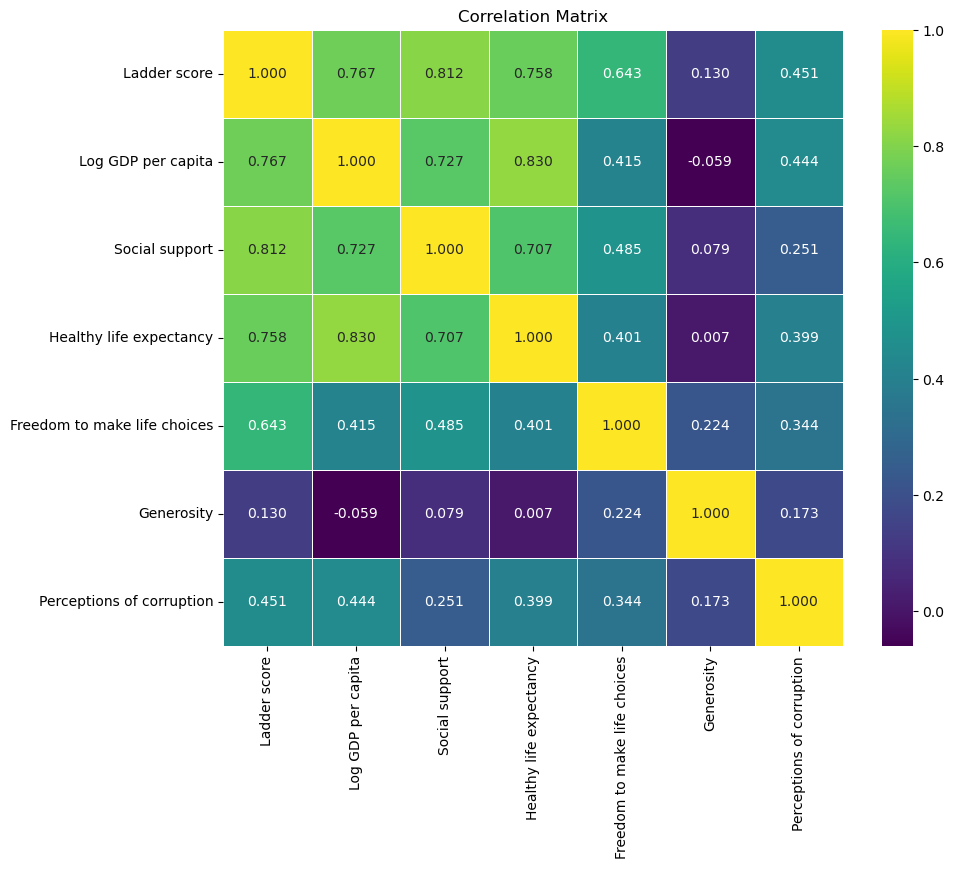

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
# 2. Correlation Analysis - Let's specify the columns again to avoid errors in the column names.
columns = ['Ladder score', 'Log GDP per capita', 'Social support',  'Healthy life expectancy',  'Freedom to make life choices',  'Generosity',  'Perceptions of corruption']
correlation_matrix = data[columns].corr()
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".3f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

The correlation matrix shows the linear relationship between variables.

Correlation with Ladder Score:

✅Social support	0.81	Very strong positive relationship – as social support increases, happiness tends to rise.

✅Log GDP per capita	0.77	Strong positive relationship – higher income per capita is associated with higher happiness.
✅Healthy life expectancy	0.76	Strong correlation – countries with longer healthy life expectancy are generally happier.
✅Freedom to make life choices	0.64	Moderate positive relationship – individual freedom contributes to happiness.
✅Perceptions of corruption	0.45	Weak to moderate positive – lower corruption perception is linked to higher happiness.
✅Generosity	0.13	Weak positive relationship – generosity has a minimal direct effect on happiness.
✅Log GDP per capita and Healthy life expectancy have a very strong correlation (0.83), indicating that wealthier countries tend to have longer and healthier lives.
✅There is a weak positive relationship between Freedom to make life choices and Generosity (0.22).
✅Generosity shows weak correlations with most other variables, suggesting its influence on happiness is limited in this dataset.



# Visualization Techniques (Matplotlib & Seaborn)

Purpose: To visualize data in a more understandable and comparable way.

Histogram Distribution: 
Let's Visualize the Histogram Distribution of variables in the dataset using the code below.

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

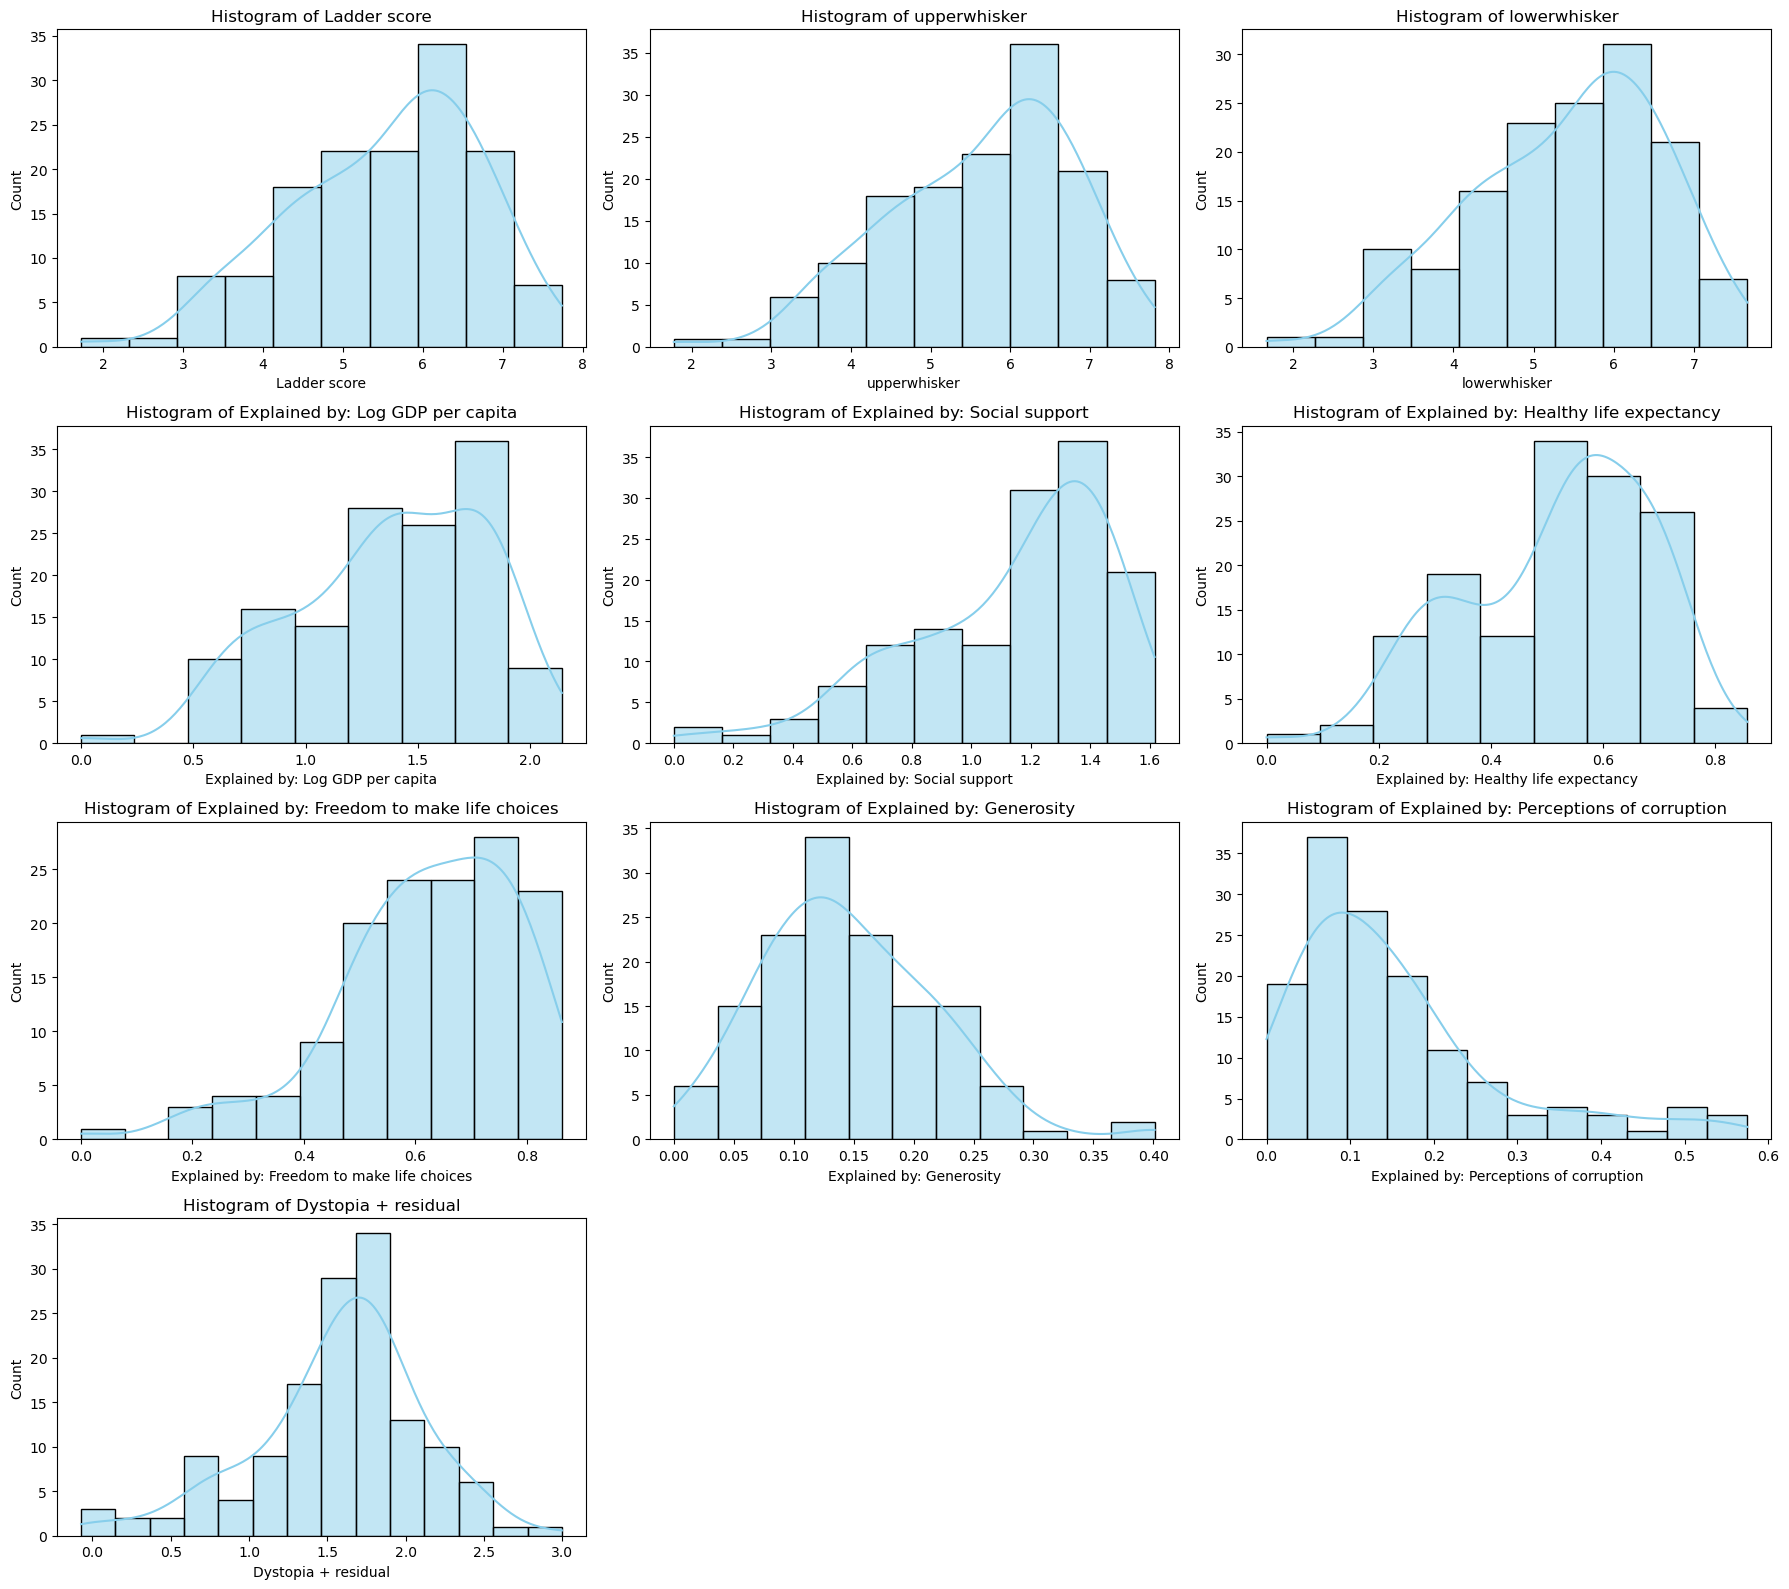

In [55]:
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv("2024.csv")

columns = ['Ladder score', 'Log GDP per capita', 'Social support',  'Healthy life expectancy',  'Freedom to make life choices',  'Generosity',  'Perceptions of corruption']

# Select numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns


# Calculate rows/columns as many as the number of charts
num_vars = len(numeric_cols)
rows = math.ceil(num_vars / 3)  # Her satıra 3 grafik

# Histograms
plt.figure(figsize=(18, rows * 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# Boxplot (Outlier Analysis) Graphs
Let's draw Boxplot (Outlier analysis) graphs of the variables in the data set using the code below.

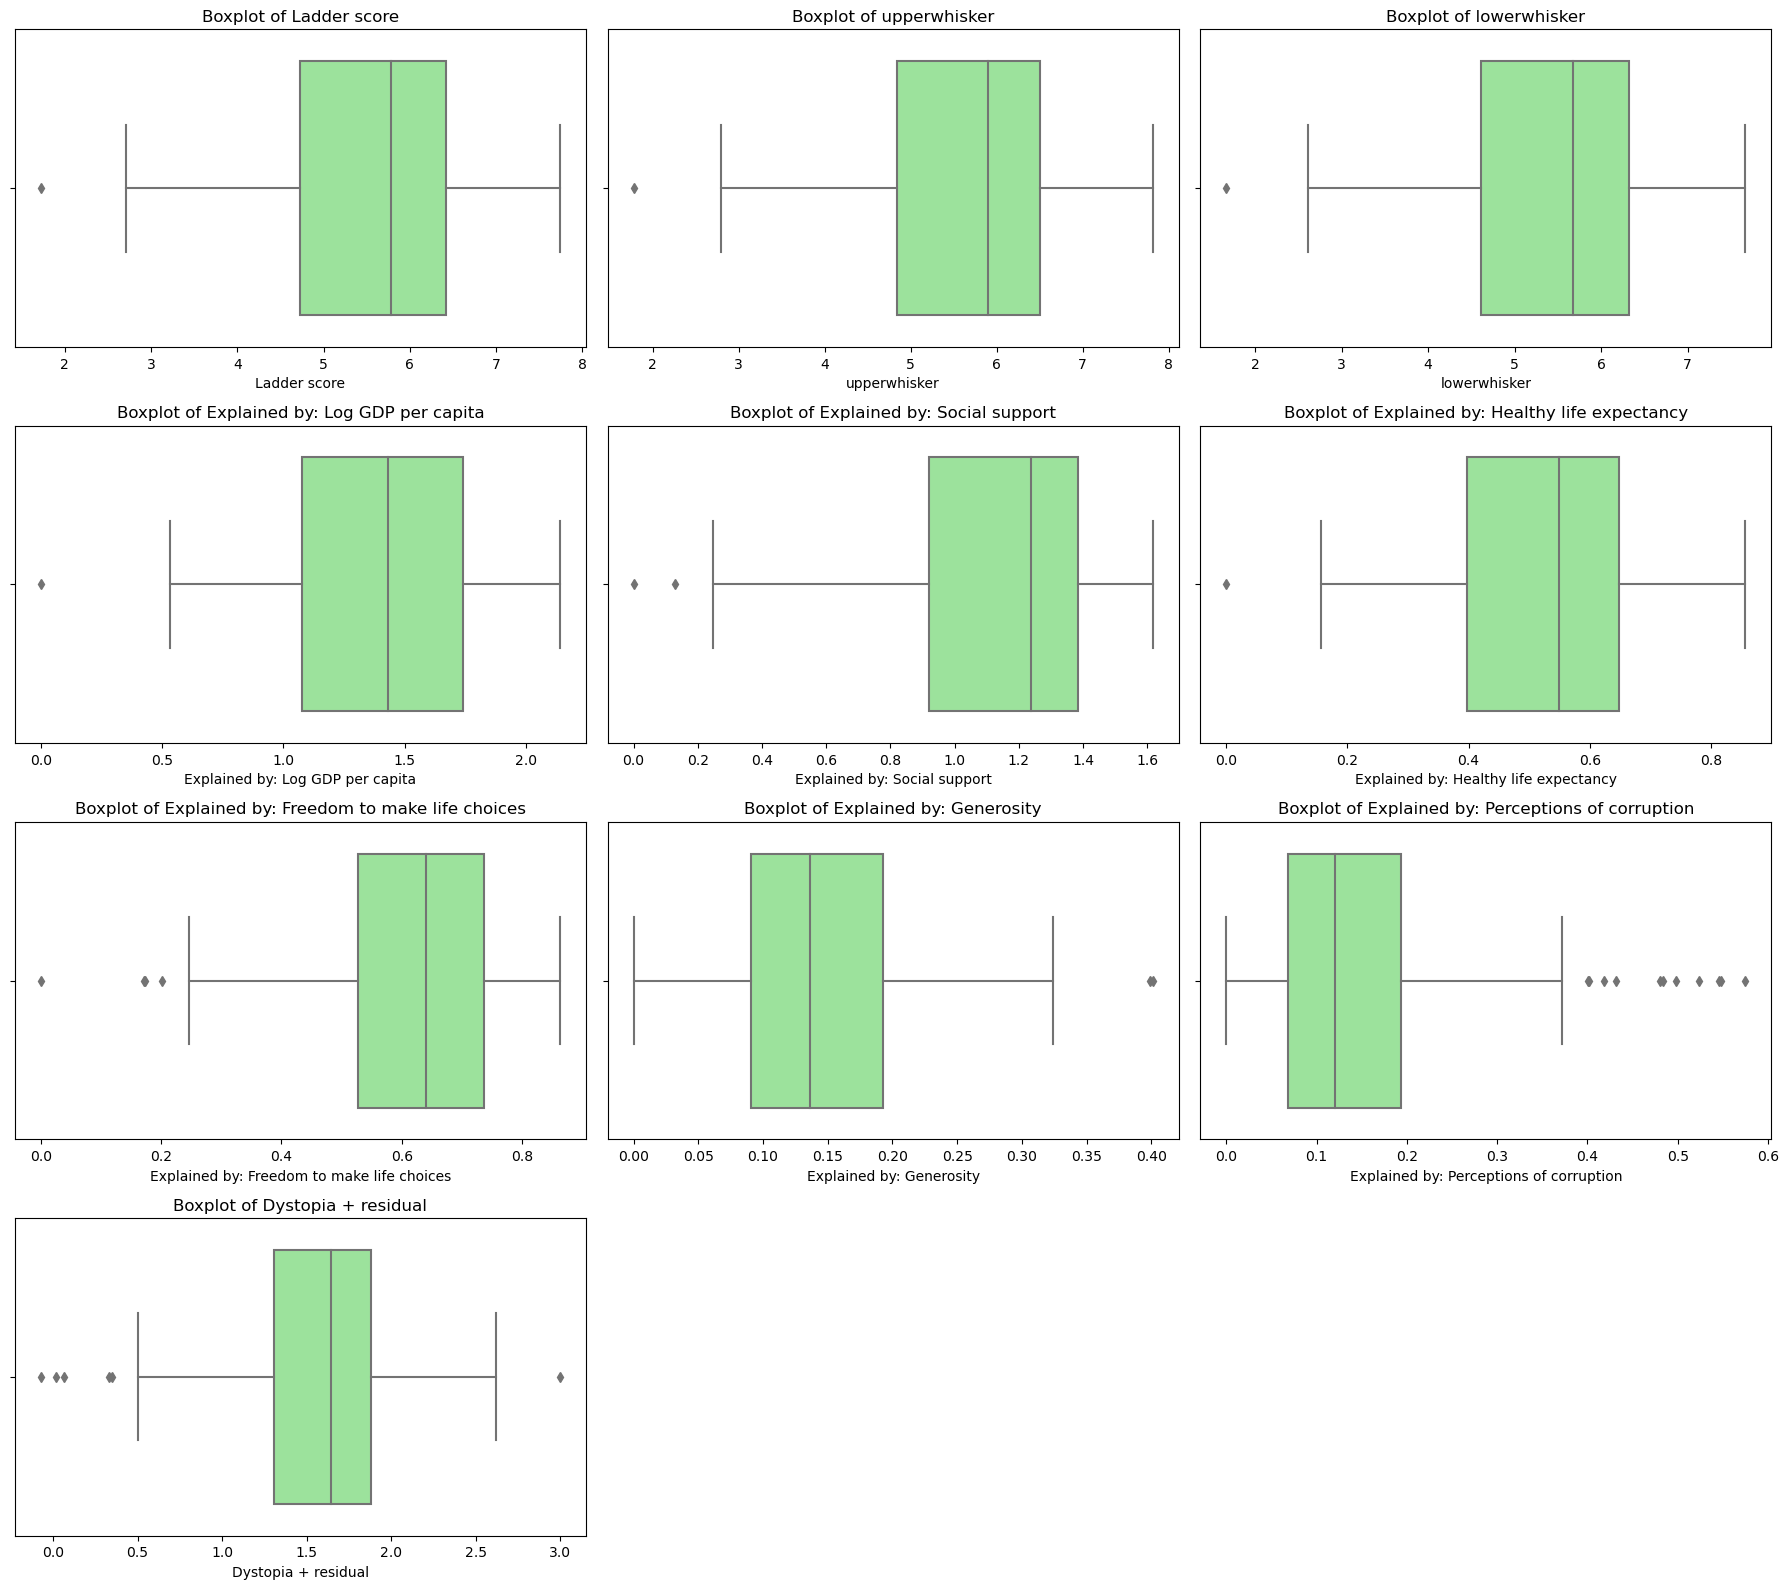

In [56]:
# Boxplots
plt.figure(figsize=(18, rows * 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(x=data[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


# Country-Based Comparisons
🎯 Purpose: To classify and compare countries according to their happiness levels.
Show All Countries Sorted by Happiness Score:


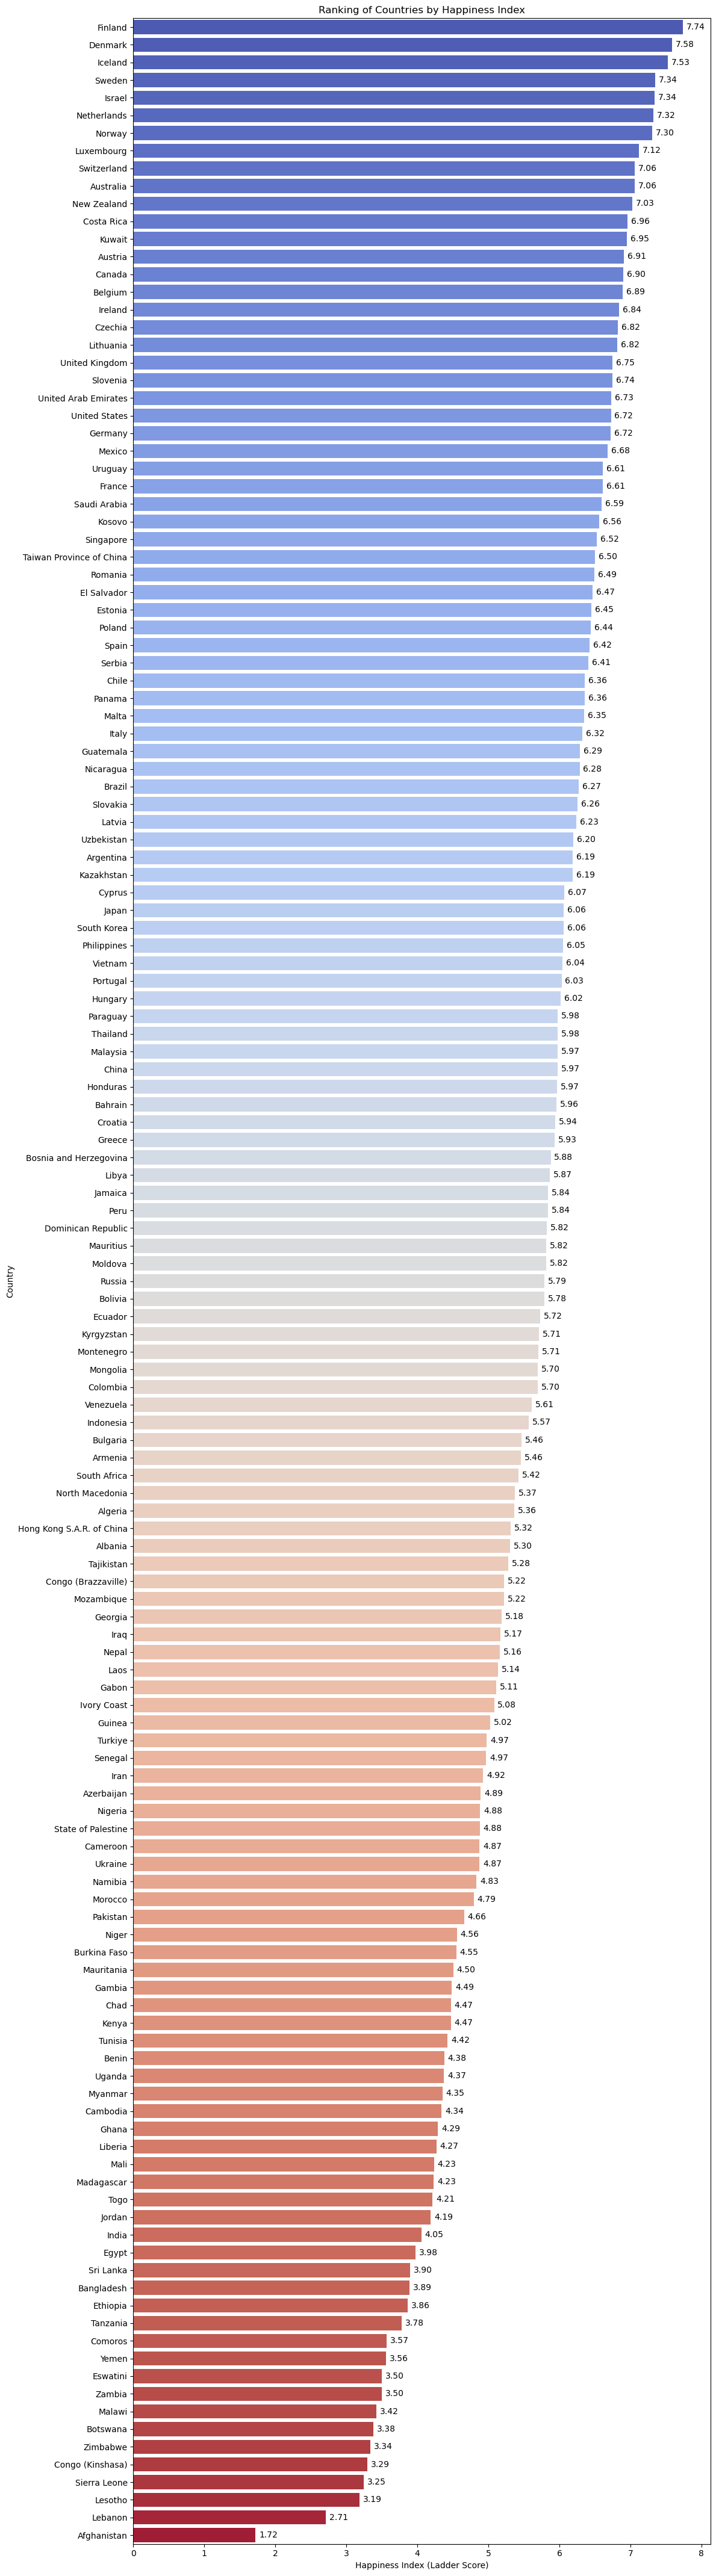

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Load the dataset
data = pd.read_csv("2024.csv")
# Sort the data by happiness score in descending order
sorted_data = data.sort_values(by="Ladder score", ascending=False)
# Dynamically adjust the figure size based on the number of countries
plt.figure(figsize=(12, len(sorted_data) * 0.3))
sns.barplot(y=sorted_data["Country name"], x=sorted_data["Ladder score"], palette="coolwarm")
# Add labels and title in English
plt.xlabel("Happiness Index (Ladder Score)")
plt.ylabel("Country")
plt.title("Ranking of Countries by Happiness Index")
# Display numeric values on the right side of each bar
for i, (score, country) in enumerate(zip(sorted_data["Ladder score"], sorted_data["Country name"])):
    plt.text(score + 0.05, i, f"{score:.2f}", va='center')
plt.tight_layout()
plt.show()



# The 20 Happiest Countries:

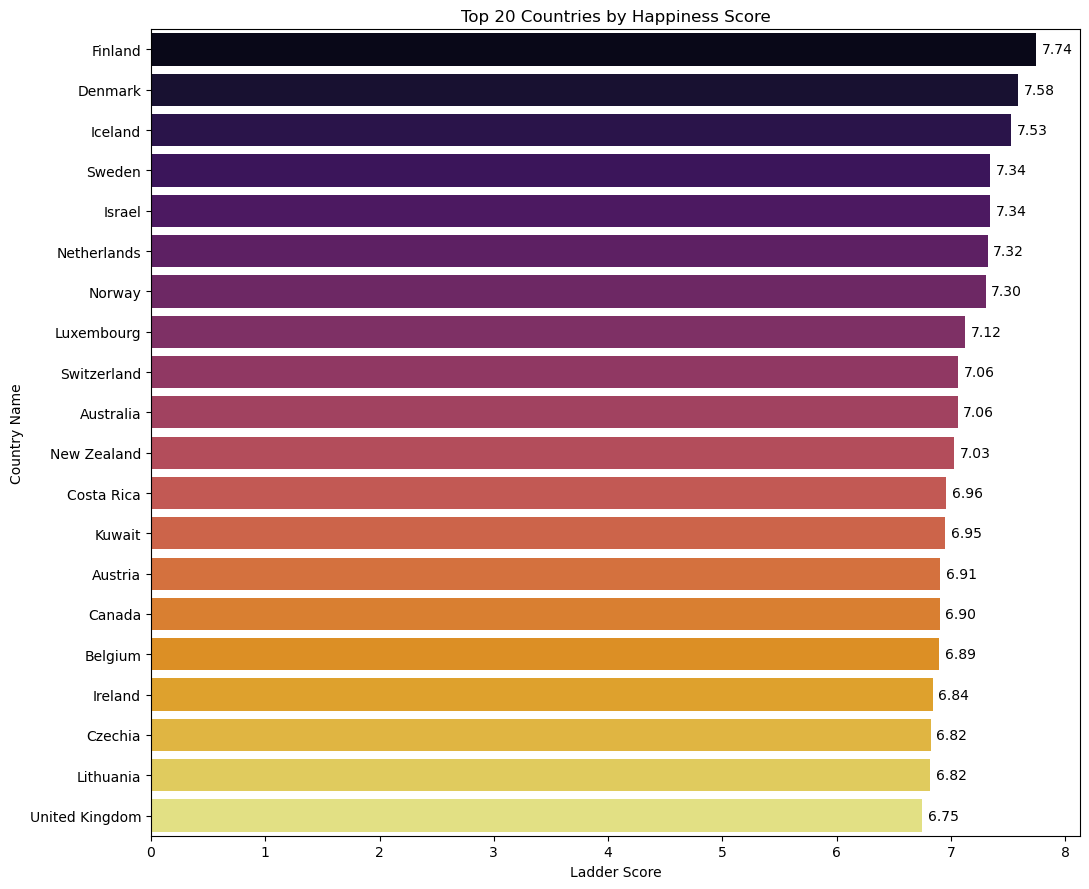

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and it contains the columns "Country name" and "Ladder score"

plt.figure(figsize=(11, 9))
top_20 = data[:20]  # First 20 rows

sns.barplot(y=top_20["Country name"], x=top_20["Ladder score"], palette="inferno")

# Add numeric labels to each bar
for index, value in enumerate(top_20["Ladder score"]):
    plt.text(value + 0.05, index, f"{value:.2f}", va='center')

plt.xlabel("Ladder Score")
plt.ylabel("Country Name")
plt.title("Top 20 Countries by Happiness Score")
plt.tight_layout()
plt.show()


# The 20 Unhappiest Countries

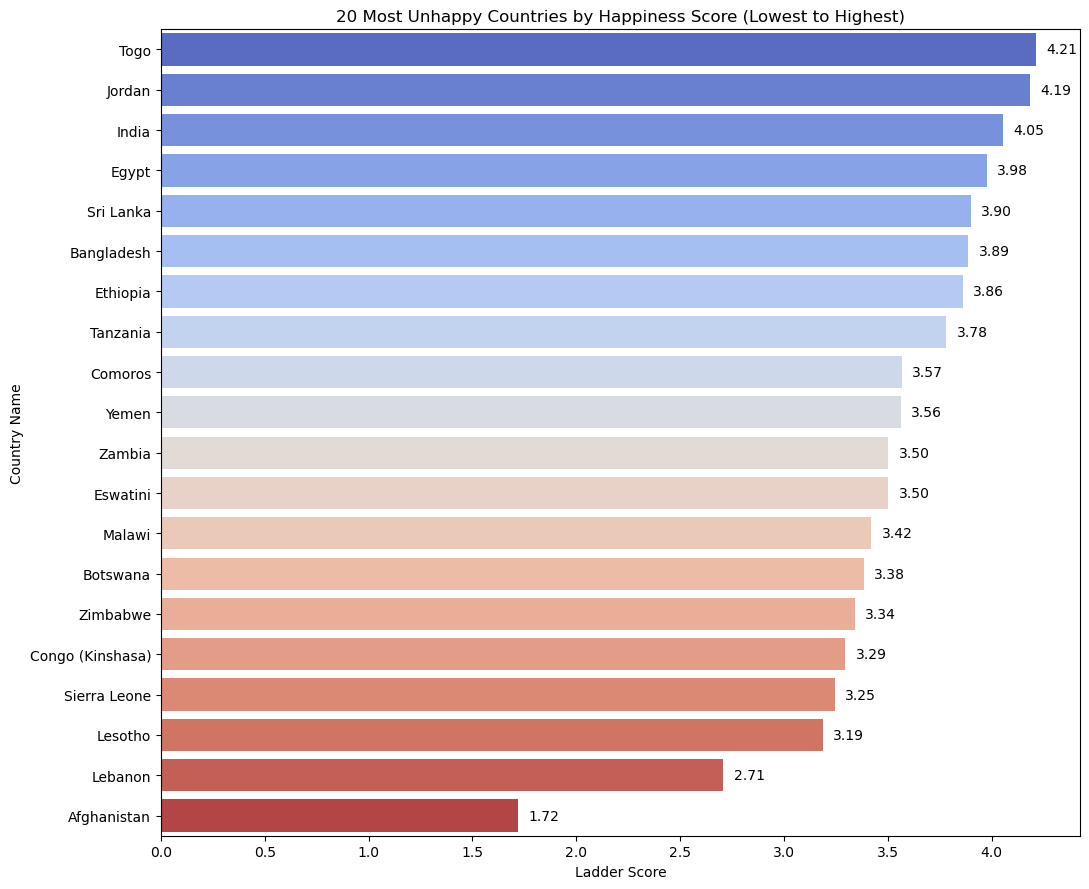

In [59]:

# Select countries with the lowest 20 happiness scores
bottom_20 = data.sort_values(by="Ladder score", ascending=True).head(20)

# Graphic size
plt.figure(figsize=(11, 9))

# Barplot - reverse the order
sns.barplot(y=bottom_20["Country name"], 
            x=bottom_20["Ladder score"], 
            palette="coolwarm", 
            order=bottom_20.sort_values("Ladder score", ascending=False)["Country name"])

# Write value on each bar
for index, value in enumerate(bottom_20.sort_values("Ladder score", ascending=False)["Ladder score"]):
    plt.text(value + 0.05, index, f"{value:.2f}", va='center')
    
# Title and tags
plt.xlabel("Ladder Score")
plt.ylabel("Country Name")
plt.title("20 Most Unhappy Countries by Happiness Score (Lowest to Highest)")
plt.tight_layout()
plt.show()


# The 20 highest income happiest countries

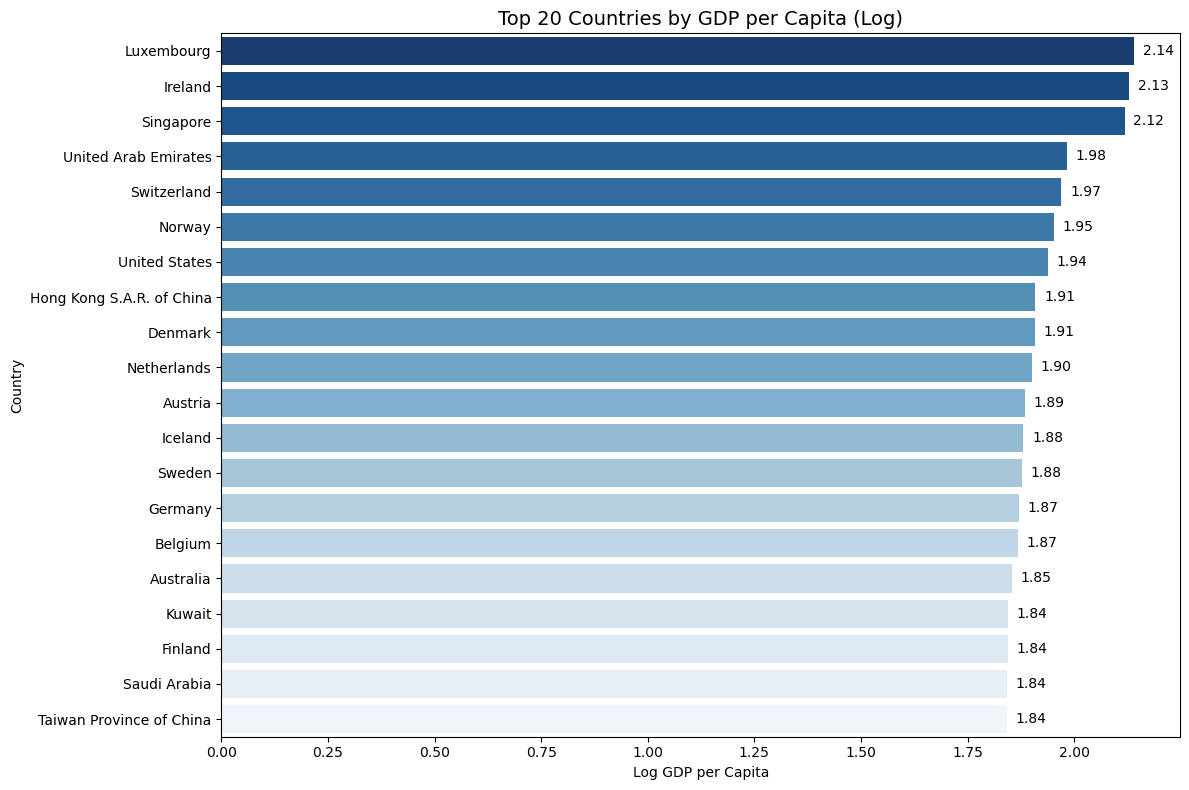

In [60]:

# Sort by GDP per capita (log) in descending order and select top 20
top_20_gdp = data.sort_values(by='Explained by: Log GDP per capita', ascending=False).head(20)
plt.figure(figsize=(12, 8)) # Plotting the histogram (barplot)
sns.barplot(
    y=top_20_gdp['Country name'],
    x=top_20_gdp['Explained by: Log GDP per capita'],
    palette='Blues_r')
# Add numerical labels to the bars
for i, value in enumerate(top_20_gdp['Explained by: Log GDP per capita']):
    plt.text(value + 0.02, i, f'{value:.2f}', va='center')
plt.title('Top 20 Countries by GDP per Capita (Log)', fontsize=14) # Titles and labels in English
plt.xlabel('Log GDP per Capita')
plt.ylabel('Country')
plt.tight_layout()
plt.show()



# "Feature Importance Analysis for Happiness Score Prediction Using Random Forest"

🎯Purpose
The purpose is to predict the happiness score (Ladder Score) of countries using a Random Forest regression model, and to identify the most influential socio-economic factors that contribute to this score.

Specifically, the code aims to:

Train a machine learning model (Random Forest Regressor) on happiness-related indicators.

Evaluate feature importance using two methods:

Gini Importance (based on how much each feature decreases impurity in the decision trees).

Permutation Importance (based on how shuffling each feature affects the model's prediction accuracy).

Visualize and interpret which features (e.g., GDP per capita, social support, freedom, etc.) have the greatest impact on national happiness scores.

This analysis helps in understanding which factors matter most in determining happiness across countries, and can guide policy-making, academic research, and data-driven insights in social sciences.

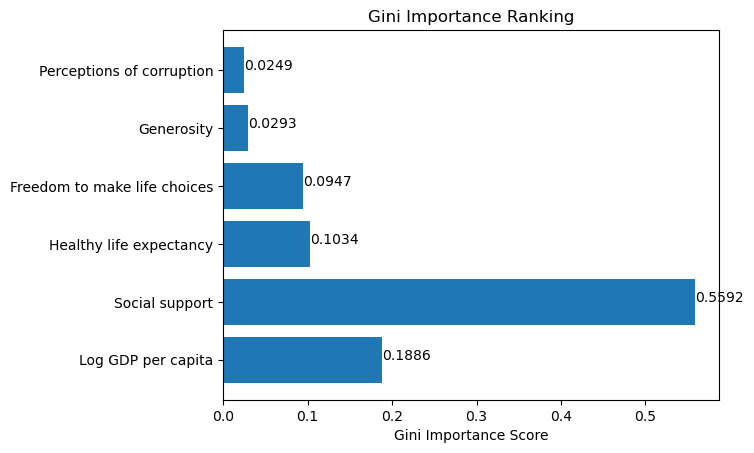

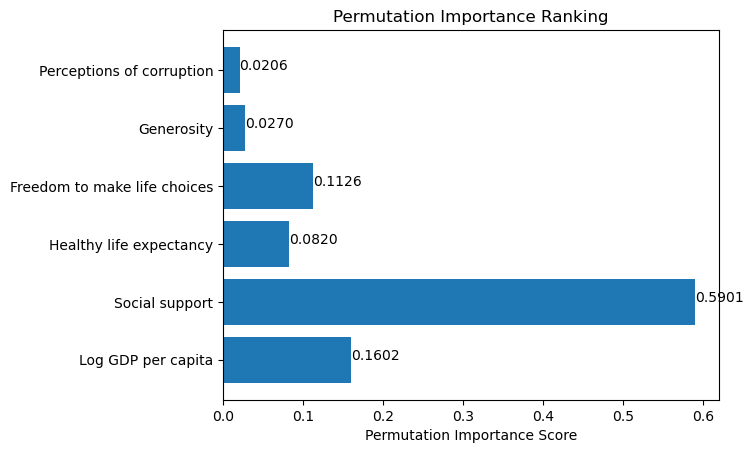

Gini Importance Scores:
Log GDP per capita: 0.1886
Social support: 0.5592
Healthy life expectancy: 0.1034
Freedom to make life choices: 0.0947
Generosity: 0.0293
Perceptions of corruption: 0.0249

Permutation Importance Scores:
Log GDP per capita: 0.1602
Social support: 0.5901
Healthy life expectancy: 0.0820
Freedom to make life choices: 0.1126
Generosity: 0.0270
Perceptions of corruption: 0.0206


In [27]:
# Gerekli kütüphaneleri yükleyin
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Veri setinizi yükleyin
data = pd.read_csv('2024.csv')

# Sütun isimlerinden 'Explained by: ' ifadesini kaldır
data.columns = data.columns.str.replace('Explained by: ', '', regex=False)

# Bağımlı ve bağımsız değişkenleri belirleyin
X = data.drop(columns=['Country name', 'Ladder score', 'upperwhisker', 'lowerwhisker', 'Dystopia + residual'])
y = data['Ladder score']  # Mutluluk skoru bağımlı değişken olarak alınır

# Model kurulum ve eğitim
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Gini önemi (özelliklerin sıralanması)
feature_importances = model.feature_importances_
feature_names = X.columns

# Permütasyon önemi
perm_importance = permutation_importance(model, X, y, n_repeats=10, random_state=42)

# Sonuçları görselleştirme
# Gini Önem Skoru Grafiği
plt.barh(feature_names, feature_importances)
plt.xlabel('Gini Importance Score')
plt.title('Gini Importance Ranking')

# Etiketleri ekleyin
for index, value in enumerate(feature_importances):
    plt.text(value, index, f'{value:.4f}')

plt.show()

# Permütasyon Önem Skoru Grafiği
perm_scores = perm_importance.importances_mean
plt.barh(feature_names, perm_scores)
plt.xlabel('Permutation Importance Score')
plt.title('Permutation Importance Ranking')

# Etiketleri ekleyin
for index, value in enumerate(perm_scores):
    plt.text(value, index, f'{value:.4f}')

plt.show()

# Önemli özelliklerin skorlarını yazdırmak
print("Gini Importance Scores:")
for feature, importance in zip(feature_names, feature_importances):
    print(f"{feature}: {importance:.4f}")

print("\nPermutation Importance Scores:")
for feature, importance in zip(feature_names, perm_scores):
    print(f"{feature}: {importance:.4f}")


# ✅ Feature Importance Results:
Social support is by far the most influential factor in predicting happiness, based on both Gini (0.56) and Permutation (0.59) scores.

Log GDP per capita comes next, indicating that economic well-being significantly contributes to happiness (Gini: 0.19, Permutation: 0.16).

Healthy life expectancy and freedom to make life choices have moderate impact, showing that health and autonomy are meaningful, but secondary contributors.

Generosity and perceptions of corruption have the least importance in the model, suggesting they may not directly affect happiness levels as strongly as other variables.

Both methods are consistent in ranking the top and bottom features, which validates the reliability of the findings.

# 5. Data Mining Methods

Data mining is the process of extracting meaningful information from large data sets. 
The following basic methods are used in this process:

# 5.2. Hierarchical cluster analysis

🎯 Main Purpose: Group the observations (countries) in the dataset according to their similarity to each other.

That is: "Which countries are similar in terms of happiness? Which countries are significantly different?"


The dendrogram shows how countries are clustered based on their similarity to each other.

Length on the y-axis = Similarity distance. The shorter the connection, the more similar the country.

# 5.3. Clustering Analysis Using K-Means
The goal here is to identify distinct groups of countries based on their happiness-related socioeconomic indicators.

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("2024.csv")


# Set column "Country name" as index
data.set_index("Country name", inplace=True)

# Select variables to use for clustering
X = data.iloc[:, 1:]  # Get all columns except the first column (Country name)

# Fill missing values with column averages
X.fillna(X.mean(), inplace=True)

# Create K-means clustering model
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model to the data
kmeans.fit(X)

C:\Users\ÇELİK\AppData\Local\Temp\ipykernel_25376\1763759092.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


KMeans(n_clusters=4, random_state=42)

C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_

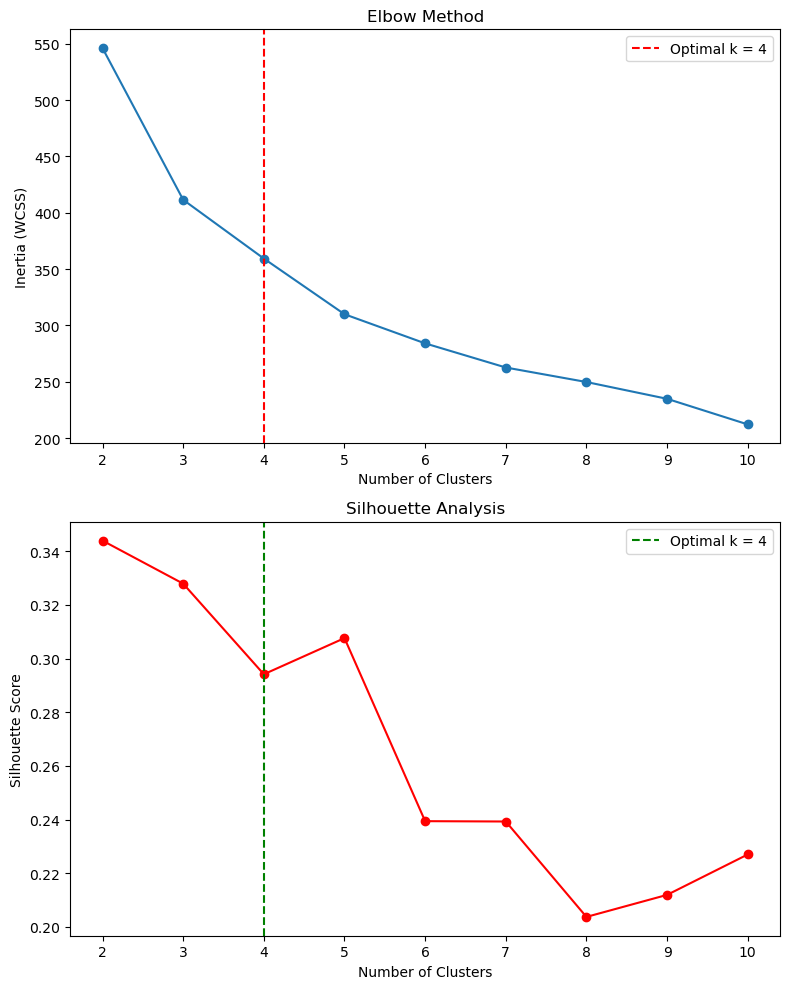

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("2024.csv")

# Extract country names and feature columns
countries = data['Country name']
numeric_columns  = [
    'Explained by: Log GDP per capita',
    'Explained by: Social support',
    'Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices',
    'Explained by: Generosity',
    'Explained by: Perceptions of corruption'
]



# Impute missing values using mean
imputer = SimpleImputer(strategy='mean')
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

# Normalize the data
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Initialize lists for SSE and silhouette scores
sse = []
sil_scores = []
K = range(2, 11)

# KMeans clustering and silhouette scoring
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[numeric_columns])
    sse.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(data[numeric_columns], kmeans.labels_))

# Plot Elbow and Silhouette scores
plt.figure(figsize=(8, 10))

# Elbow method plot
plt.subplot(2, 1, 1)
plt.plot(K, sse, marker='o')
plt.axvline(x=4, color='red', linestyle='--', label='Optimal k = 4')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method')
plt.legend()

# Silhouette score plot
plt.subplot(2, 1, 2)
plt.plot(K, sil_scores, marker='o', color='red')
plt.axvline(x=4, color='green', linestyle='--', label='Optimal k = 4')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.legend()

plt.tight_layout()
plt.show()

Resault:

Elbow Method: We plot inertia (sum of squared errors) vs. number of clusters; the “elbow” point indicates diminishing returns for additional clusters.

Silhouette Score: Measures how similar an object is to its own cluster compared to other clusters. A higher score indicates better-defined clusters.

plt.axvline() adds a vertical dashed line to highlight the optimal k (in this case, k=4).

In [31]:
# Create and fit the K-Means clustering model with k=4 using normalized data
kmeans = KMeans(n_clusters=4, random_state=42) #random_state=42 Provides a fixed random value to get the same result in each run.
clusters = kmeans.fit_predict(data[numeric_columns])
data['Cluster'] = clusters  # Add the cluster labels to the DataFrame

# Print the cluster centers and the number of members in each cluster
print("Cluster Centers:")
print(kmeans.cluster_centers_)

print("\nNumber of Clusters and Cluster Sizes:")
print(data['Cluster'].value_counts())

Cluster Centers:
[[ 0.32181358  0.46337137  0.39047828  0.39036915 -0.07588712 -0.3491425 ]
 [-1.35147639 -1.29334812 -1.25562144 -0.62600603  0.36876056 -0.29759013]
 [ 1.2701553   0.87828434  1.13085295  0.82007518  0.69468558  1.98589189]
 [ 0.00536472 -0.1884829  -0.28322574 -1.1794702  -1.26130296 -0.40271085]]

Number of Clusters and Cluster Sizes:
Cluster
0    68
1    36
2    21
3    18
Name: count, dtype: int64


C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Interpretation: Number of Clusters and Cluster Sizes
The K-means clustering algorithm has grouped the countries into 4 distinct clusters based on selected socio-economic indicators related to happiness. The distribution of countries across these clusters is as follows:

Cluster 0: 68 countries

Cluster 1: 36 countries

Cluster 2: 21 countries

Cluster 3: 18 countries

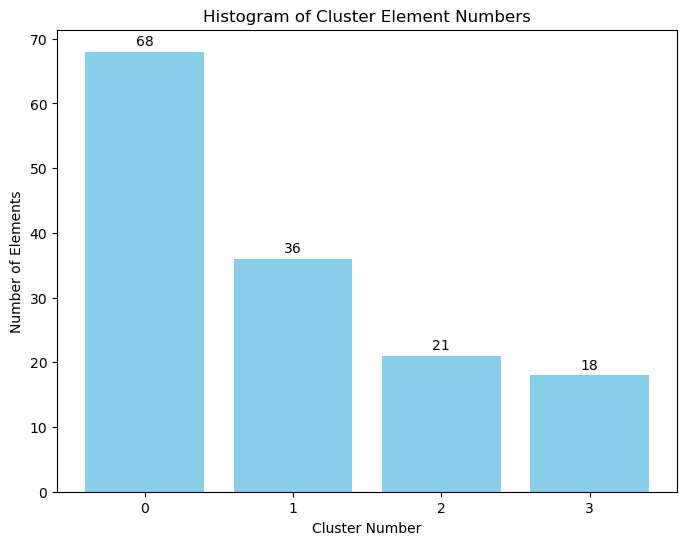

In [32]:
#Let's calculate the number of elements in each cluster (cluster labels are obtained from normalized data)
cluster_counts = data['Cluster'].value_counts().sort_index()

# Let's draw the histogram (bar plot) graph
plt.figure(figsize=(8, 6))
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.xlabel("Cluster Number")
plt.ylabel("Number of Elements")
plt.title("Histogram of Cluster Element Numbers")
plt.xticks(cluster_counts.index)

# Let's add the element numbers as labels on each bar
for i, count in enumerate(cluster_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.show()


KMeans(n_clusters=4, random_state=42) creates a K-Means model with 4 clusters.

random_state=42 Provides a fixed random value to get the same result in each run.

fit_predict() both fits the model and returns the cluster labels.

We print cluster centers to see the centroid values and count the number of data points in each cluster using value_counts().

# "Cluster Profiling of Countries Based on Normalized Happiness Indicators Using K-Means

The purpose of this code is to group countries into clusters based on various happiness-related indicators (such as GDP, social support, life expectancy, etc.), using K-Means clustering on normalized data. By calculating and visualizing the average normalized values of each feature for every cluster, the analysis aims to:

Identify patterns and similarities between countries,

Understand how different factors contribute to distinct country profiles,

And reveal data-driven groupings that may not be immediately visible in raw data.

This approach is useful for policy analysis, global comparisons, and strategic classification of nations based on happiness and well-being metrics.

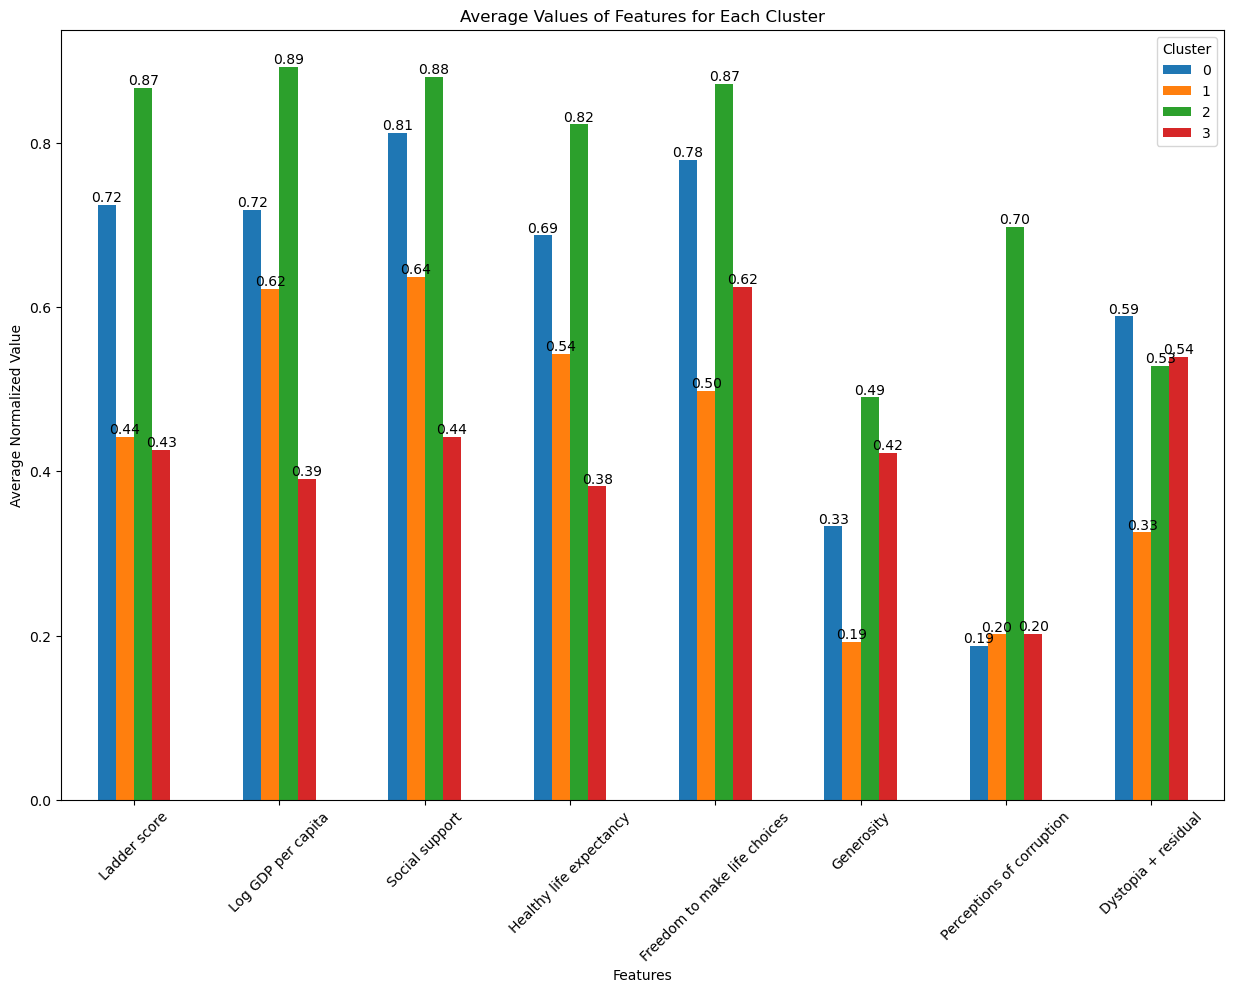

         Ladder score  Log GDP per capita  Social support  \
Cluster                                                     
0            0.724329            0.718254        0.812053   
1            0.441694            0.622548        0.636943   
2            0.866754            0.892640        0.879995   
3            0.426233            0.391358        0.441955   

         Healthy life expectancy  Freedom to make life choices  Generosity  \
Cluster                                                                      
0                       0.687449                      0.779213    0.332967   
1                       0.543466                      0.498262    0.192332   
2                       0.822359                      0.871379    0.490203   
3                       0.381833                      0.624595    0.422597   

         Perceptions of corruption  Dystopia + residual  
Cluster                                                  
0                         0.187420             0

In [29]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler  # NEW: Import MinMaxScaler for [0,1] scaling

# Load the dataset
data = pd.read_csv('2024.csv')

# Remove 'Explained by: ' from column names
data.columns = data.columns.str.replace('Explained by: ', '', regex=False)

# Set 'Country name' as the index
data.set_index("Country name", inplace=True)

# Remove the 'upperwhisker' and 'lowerwhisker' columns from the dataset
X = data.drop(['upperwhisker', 'lowerwhisker'], axis=1)

# Fill missing values with column means
X.fillna(X.mean(), inplace=True)

# NEW: Normalize the data using MinMaxScaler for a [0,1] range
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

# NEW: Create and fit the KMeans clustering model on the normalized data
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_normalized)

# NEW: Calculate the mean values for each normalized feature in each cluster
cluster_means = X_normalized.copy()
cluster_means['Cluster'] = data['Cluster']
cluster_means = cluster_means.groupby('Cluster').mean()

# Plot the average values of normalized features in each cluster with a bar chart and label each bar with its value
fig, ax = plt.subplots(figsize=(15, 10))
bars = cluster_means.T.plot(kind='bar', ax=ax)

# Add labels on each bar
for container in bars.containers:
    bars.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)

# Set the title and labels with updated information about normalization
plt.title('Average Values of Features for Each Cluster')  # NEW: Updated title
plt.xlabel('Features')
plt.ylabel('Average Normalized Value')  # NEW: Updated ylabel
plt.legend(title='Cluster')

# Rotate the X-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

plt.show()
print(cluster_means)

# Cluster-Based Interpretation of Country Groups
Cluster 0:
Moderately high happiness (Ladder Score ≈ 0.72).

Good social support and freedom levels.

Balanced economic and health indicators.

Represents stable, mid-to-high performing countries.

Cluster 1:
Lower happiness and life quality scores overall.

Moderate GDP, but low health, freedom, and generosity.

Indicates developing or struggling countries with limited support systems.

Cluster 2:
Highest happiness (≈ 0.87) and best scores in almost all features.

Very strong GDP, social support, freedom, and generosity.

Represents high-income, well-developed countries.

Cluster 3:
Low happiness (≈ 0.42) and weakest GDP, health, and support scores.

Slightly better generosity and corruption perception than Cluster 1.

Likely reflects least developed or most vulnerable nations.

# "Cluster Analysis and Feature Distribution of Countries Based on Happiness Indicators Using K-Means"

# 🎯Purpose
The goal of this analysis is to:

Group countries into 4 distinct clusters based on normalized happiness-related indicators using K-Means clustering.

Compute and export the mean and standard deviation of each feature per cluster.

Visualize the distribution of each feature within clusters using boxplots, providing insight into how different factors vary across country groups.

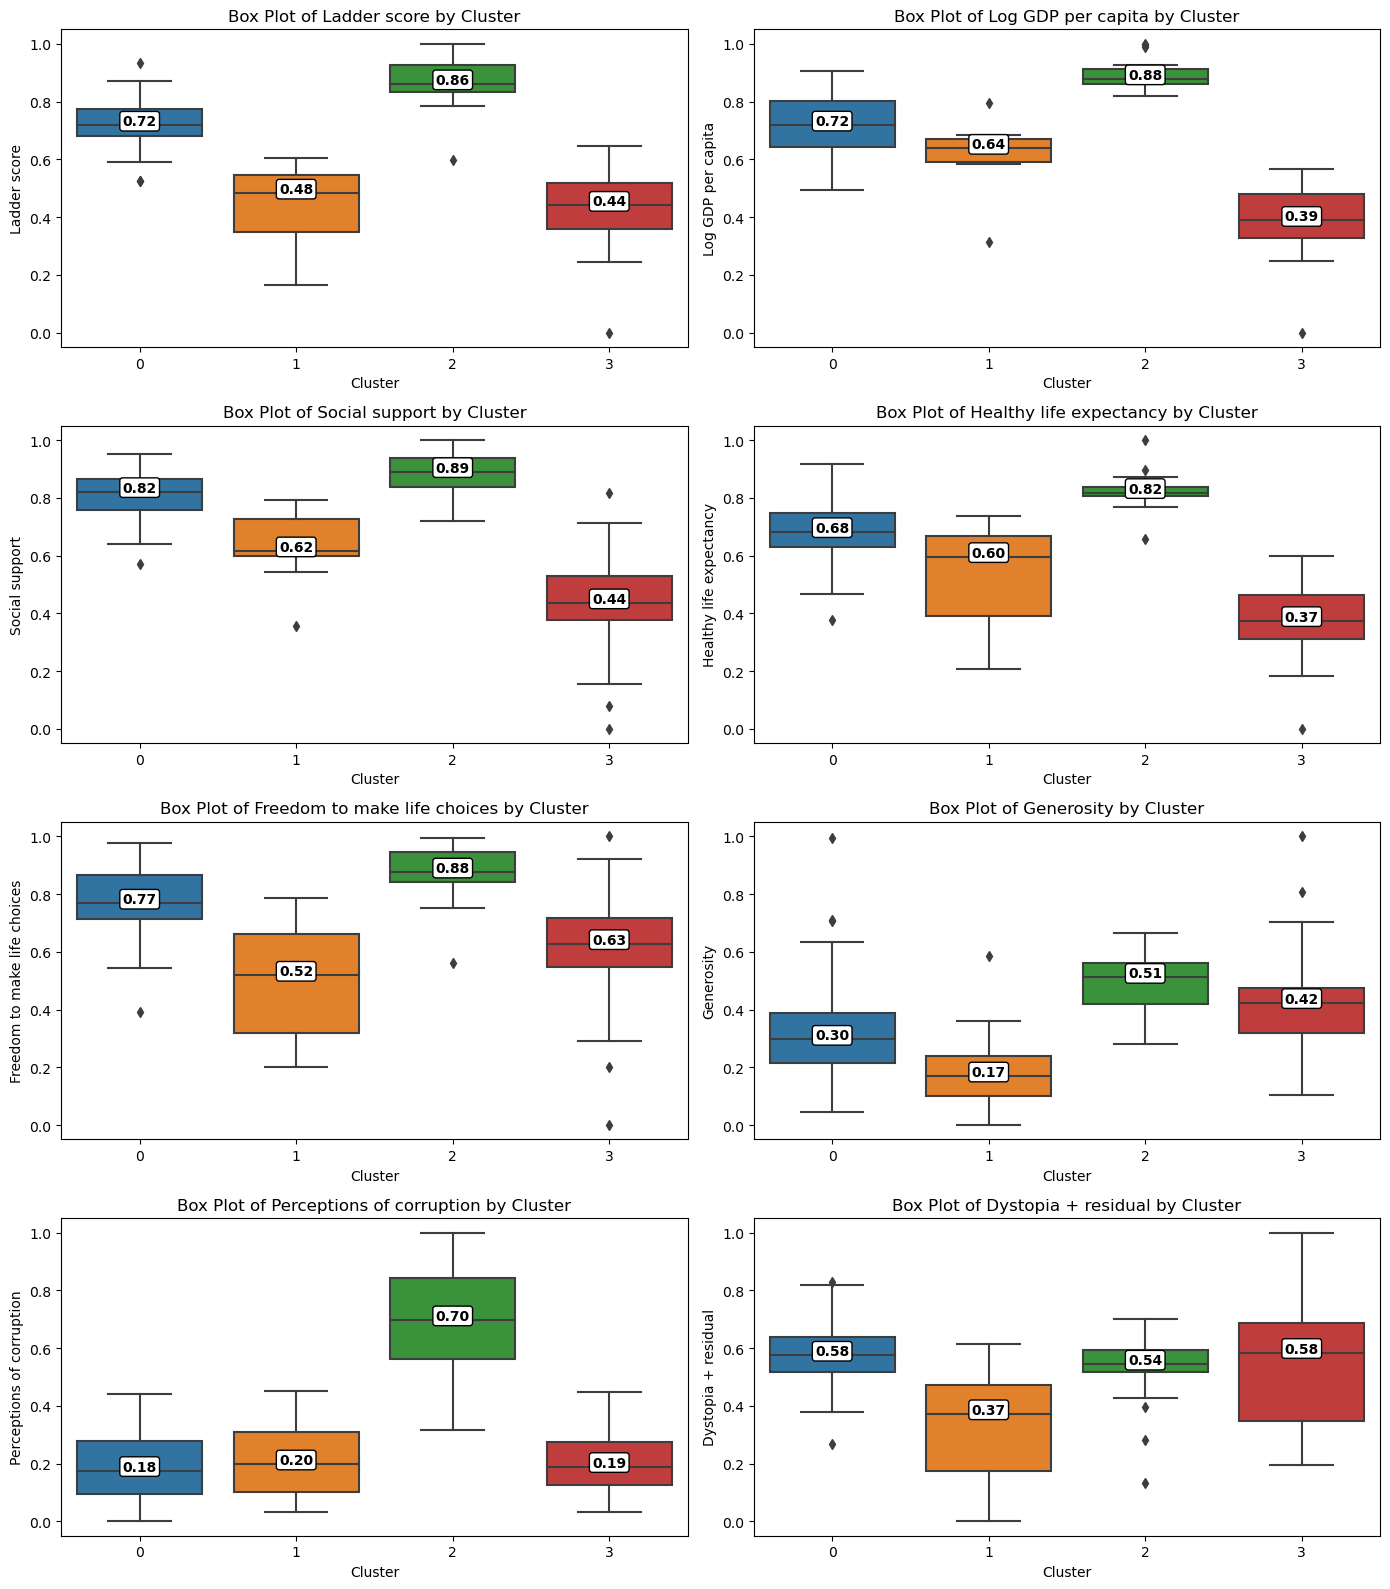

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('2024.csv')

# Clean column names
data.columns = data.columns.str.replace('Explained by: ', '', regex=False)
data.set_index("Country name", inplace=True)

# Drop unnecessary columns
X = data.drop(['upperwhisker', 'lowerwhisker'], axis=1, errors='ignore')
X.fillna(X.mean(), inplace=True)

# Normalize data
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

# K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X_normalized)

# Box Plot (with cluster-based labels)
num_columns = len(X_normalized.columns)
fig, axes = plt.subplots(nrows=(num_columns // 2) + (num_columns % 2), ncols=2, figsize=(14, num_columns * 2))

for i, column in enumerate(X_normalized.columns):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    sns.boxplot(x=data['Cluster'], y=X_normalized[column], ax=ax)
    ax.set_title(f'Box Plot of {column} by Cluster')
    ax.set_xlabel('Cluster')
    ax.set_ylabel(column)
    
    # ➕ Add numerical median values centered on each box
    medians = X_normalized.groupby(data['Cluster'])[column].median()
    for tick, cluster in enumerate(sorted(data['Cluster'].unique())):
        median_val = medians[cluster]
        ax.text(
            tick, median_val,
            f'{median_val:.2f}',
            horizontalalignment='center',
            size=10,
            color='black',
            weight='bold',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2')
        )

# Remove empty subplots
for i in range(num_columns, len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


In [ ]:
✅ Cluster-Based Summary Interpretation
🔹 Cluster 0
Above-average happiness (Ladder Score ≈ 0.72).

Strong social support and freedom.

Moderate in most features with low variation (Std Dev) → Indicates stable, balanced countries.

🔹 Cluster 1
Low happiness (≈ 0.44), despite decent GDP.

Weak generosity and freedom; moderate life expectancy.

Higher variability suggests developing countries with uneven well-being.

🔹 Cluster 2
Highest happiness (≈ 0.87) and top scores in almost all features.

High GDP, social support, freedom, and generosity.

Low Std Dev → Represents well-developed, consistently high-performing countries.

🔹 Cluster 3
Lowest happiness (≈ 0.42).

Very low GDP, support, and life expectancy, but moderately high generosity.

Represents low-income or vulnerable countries with moderate variation.

# Visualizing the Clusters
To visualize the clustering, we reduce the dimensionality of the data using Principal Component Analysis (PCA).


# Cluster Interpretation and Labeling
The following shows how to use the correct column names to perform PCA and label the clusters with country names. In the dataset, numeric columns are now named as follows:

"Ladder_score"

"upperwhisker"

"lowerwhisker"

"_Log_GDP_per_capita"

"_Social_support"

"_Healthy_life_expectancy"

"_Freedom_to_make_life_choices"

"_Generosity"

"_Perceptions_of_corruption"

"Dystopia_+_residual"

Also, the country names are in the column "Country_name" and the cluster labels are stored in "Cluster".


Below is the Python code that uses the normalized data for PCA visualization with country labels and then prints the list of countries for each cluster:

C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


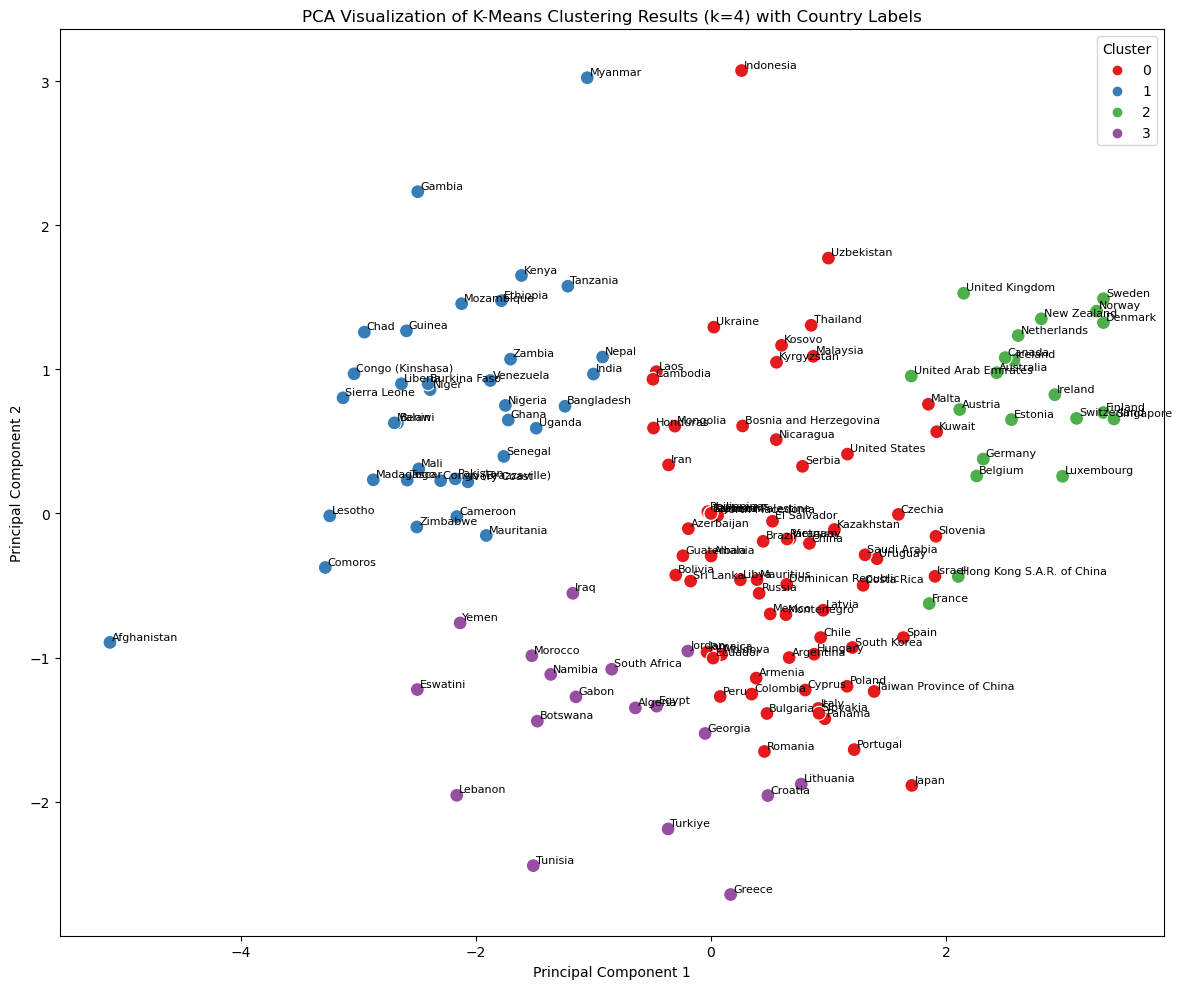

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv("2024.csv")

# Select numeric columns
numeric_columns = [
    'Explained by: Log GDP per capita',
    'Explained by: Social support',
    'Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices',
    'Explained by: Generosity',
    'Explained by: Perceptions of corruption'
]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data[numeric_columns])

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Perform K-Means clustering (e.g., 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
data['Cluster'] = clusters  # Add cluster labels to original data

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)

# Plot the PCA scatter plot with country names
plt.figure(figsize=(12, 10))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette='Set1', s=100)

# Annotate with country names
for i, country in enumerate(data['Country name']):
    plt.text(X_pca[i, 0] + 0.02, X_pca[i, 1] + 0.02, country, fontsize=8)

plt.title("PCA Visualization of K-Means Clustering Results (k=4) with Country Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


# Performance Comparison of Machine Learning Algorithms

🎯Purpose:
The purpose of this code is to divide countries into clusters according to their happiness level with the K-Means algorithm and then treat these clusters as a classification problem and automatically predict these clusters with various machine learning models.

C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Tuned Logistic Regression Confusion Matrix:
[[13  1  0  0]
 [ 0  7  0  0]
 [ 2  0  3  0]
 [ 0  0  0  3]]


Decision Tree Confusion Matrix:
[[13  1  0  0]
 [ 0  6  0  1]
 [ 2  0  3  0]
 [ 1  0  0  2]]


Tuned SVC Confusion Matrix:
[[13  1  0  0]
 [ 0  6  0  1]
 [ 2  0  3  0]
 [ 1  0  0  2]]


Random Forest Confusion Matrix:
[[13  1  0  0]
 [ 0  7  0  0]
 [ 2  0  3  0]
 [ 1  0  0  2]]


Neural Network Confusion Matrix:
[[14  0  0  0]
 [ 0  7  0  0]
 [ 2  0  3  0]
 [ 1  0  0  2]]


Tuned XGBoost Confusion Matrix:
[[13  1  0  0]
 [ 0  5  0  2]
 [ 2  0  3  0]
 [ 1  0  0  2]]



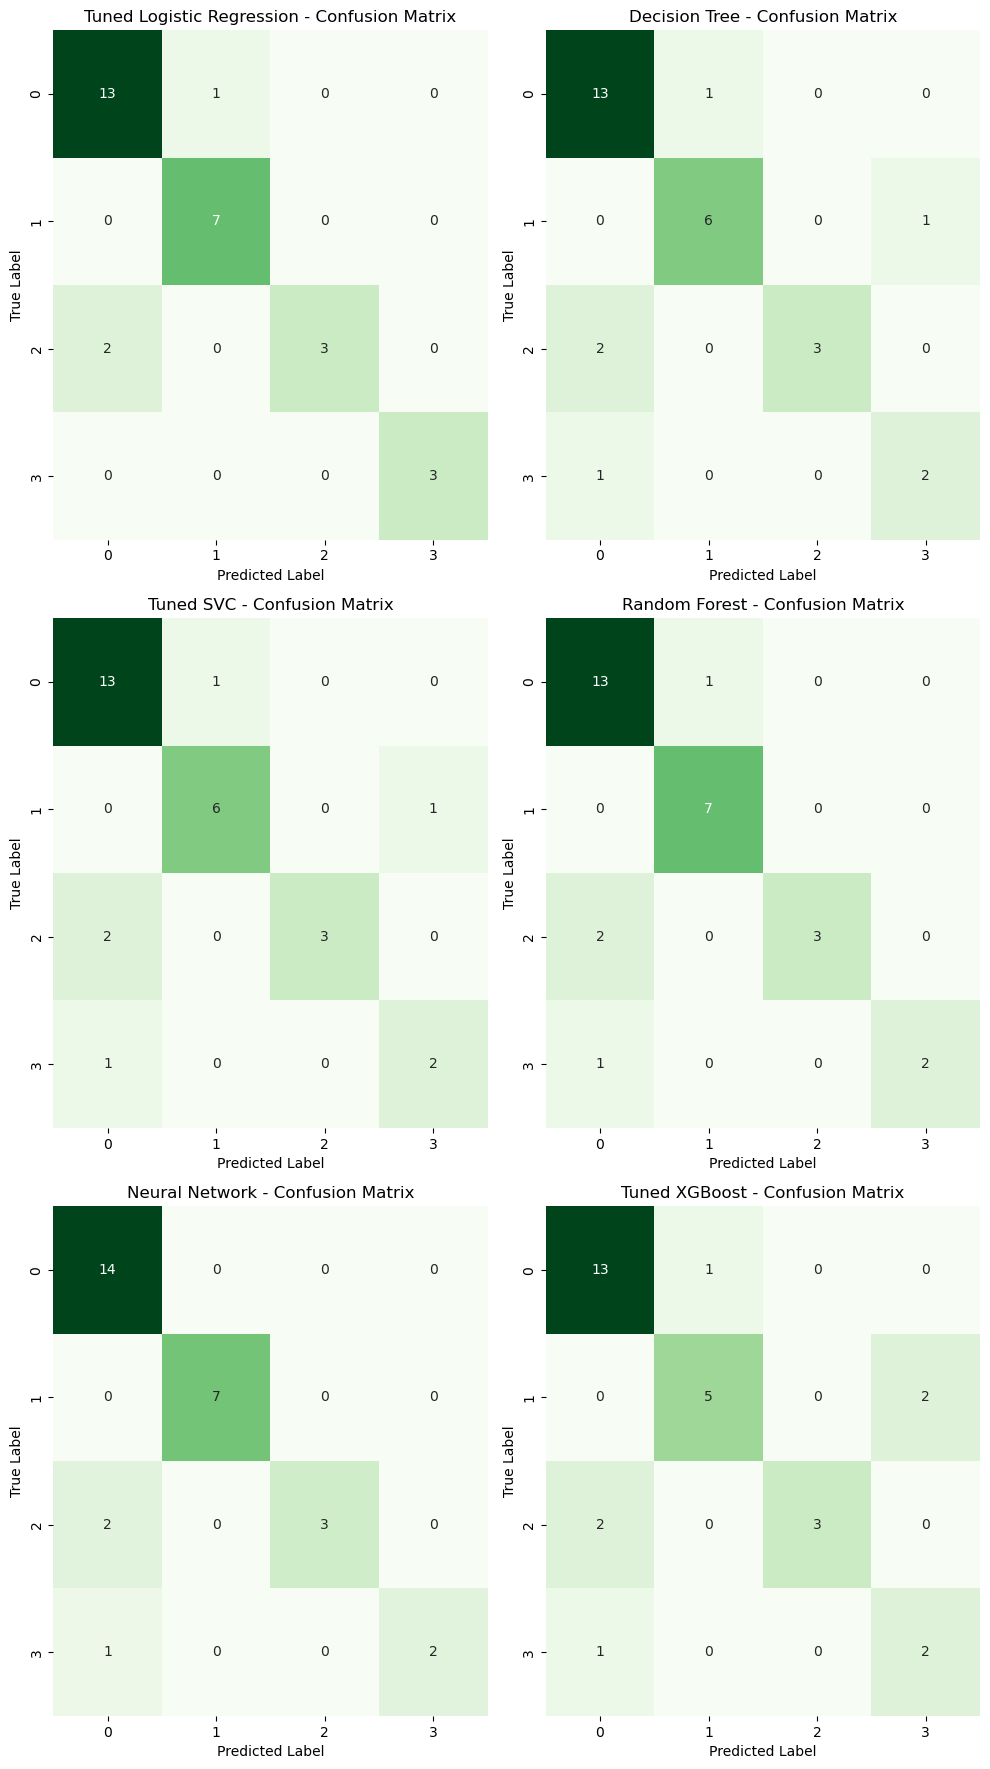


Tuned Logistic Regression Accuracy: 0.8966
Tuned Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.88      1.00      0.93         7
           2       1.00      0.60      0.75         5
           3       1.00      1.00      1.00         3

    accuracy                           0.90        29
   macro avg       0.94      0.88      0.89        29
weighted avg       0.91      0.90      0.89        29


Decision Tree Accuracy: 0.8276
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.86      0.86      0.86         7
           2       1.00      0.60      0.75         5
           3       0.67      0.67      0.67         3

    accuracy                           0.83        29
   macro avg       0.83      0.76      0.79        29
weighted avg       0.84

In [26]:
# Import necessary libraries for modeling and evaluation
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Import tuned models
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Load the dataset
df = pd.read_csv('2024.csv')

# Separate features and target variable
X = df.drop(columns=['Country name', 'Ladder score'])
y = df['Ladder score']

# Handle missing values
X_imputed = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(X), columns=X.columns)



# Generate cluster-based labels using KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
y_clusters = kmeans.fit_predict(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_clusters, test_size=0.2, random_state=42)

# Define tuned models

# ✅ Tuned Logistic Regression
logistic_model = LogisticRegression(
    penalty='l2',             # L2 regularization to prevent overfitting
    C=10,                    # Regularization strength: try values like 0.01, 0.1, 1, 10
    solver='lbfgs',           # Good for multiclass problems
    max_iter=1000,            # Increase if convergence warning appears
    multi_class='multinomial',# Better for multiclass classification than 'ovr'
    class_weight='balanced',  # Useful if classes are imbalanced
    random_state=42
)

# ✅ Tuned SVC model
svc_tuned = SVC(
    C=10,               # High regularization strength
    kernel='rbf',       # Radial Basis Function kernel
    gamma=0.05,         # Lower gamma for smoother decision boundary
    probability=True,
    random_state=42
)

# Other models (kept default or previously tuned)

decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
neural_network_model = MLPClassifier(max_iter=1000, random_state=42)
xgb_tuned = XGBClassifier(n_estimators=200,max_depth=5,learning_rate=0.05,subsample=0.8,
        colsample_bytree=0.8,use_label_encoder=False,eval_metric='mlogloss',random_state=42)

# Train all models
logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
svc_tuned.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
neural_network_model.fit(X_train, y_train)
xgb_tuned.fit(X_train, y_train)

# Predict with all models
y_pred_logistic = logistic_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_svc = svc_tuned.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)
y_pred_neural_network = neural_network_model.predict(X_test)
y_pred_xgboost = xgb_tuned.predict(X_test)

# Store predictions
models = {
    "Tuned Logistic Regression": y_pred_logistic,
    "Decision Tree": y_pred_decision_tree,
    "Tuned SVC": y_pred_svc,
    "Random Forest": y_pred_random_forest,
    "Neural Network": y_pred_neural_network,
    "Tuned XGBoost": y_pred_xgboost
}

# Plot confusion matrices
plt.figure(figsize=(10, 35))

for i, (model_name, y_pred) in enumerate(models.items(), 1):
    plt.subplot(len(models), 2, i)
    cm = confusion_matrix(y_test, y_pred)
    
    # Print confusion matrix values
    print(f"\n{model_name} Confusion Matrix:\n{cm}\n")
    
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.tight_layout()
plt.show()

# Print classification metrics
for model_name, y_pred in models.items():
    print(f"\n{model_name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"{model_name} Classification Report:\n{classification_report(y_test, y_pred)}")


In [ ]:
"Comparison of Classification Model Accuracies Based on K-Means Cluster Labels"

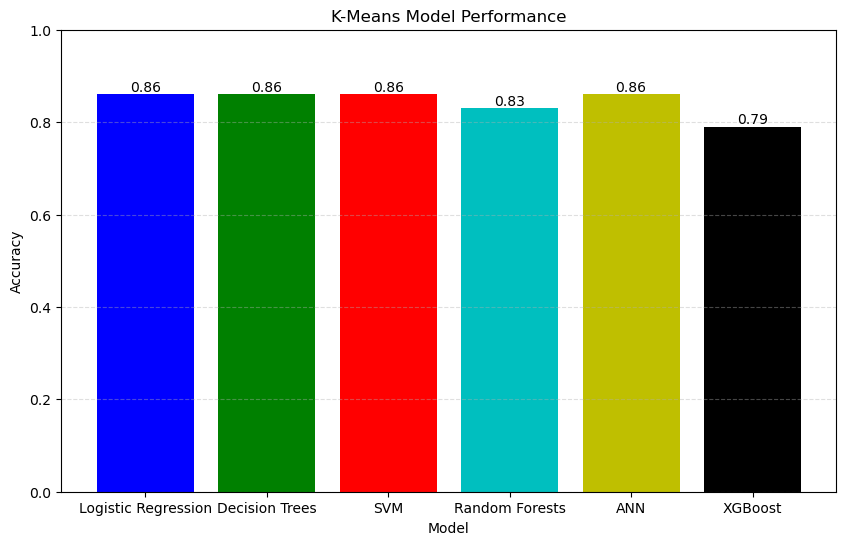

In [15]:
# Model names and accuracy values
models = ["Logistic Regression", "Decision Trees", "SVM", "Random Forests", "ANN", "XGBoost"]
accuracies = [0.86, 0.86, 0.86, 0.83, 0.86, 0.79]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=["b", "g", "r", "c", "y", "k"])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("K-Means Model Performance")
plt.ylim(0, 1)  # Y-axis limits
plt.grid(axis="y", linestyle="--", alpha=0.4)

# # Label numeric values
for i, acc in enumerate(accuracies):
    plt.text(i, acc, str(acc), ha='center', va='bottom')

plt.show()

✅ Interpretation of the Results
Logistic Regression, Decision Trees, SVM, and ANN (Artificial Neural Network) all achieved the highest accuracy of 86%, indicating strong performance in predicting K-Means clusters.

Random Forests performed slightly lower, with an accuracy of 83%, but still showed reliable classification ability.

XGBoost had the lowest accuracy at 79%, suggesting that it may not be as effective in modeling the cluster structure generated by K-Means in this dataset.

These results show that simpler models (e.g., logistic regression and decision trees) can perform just as well—or even better—than more complex ones, depending on the data and the task.

The close performance among top models implies that the underlying cluster patterns in the data are well-structured and learnable.

